# Seaborn - Statistical Plots

In [2]:
# Importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Generate the plots and charts within this window instead of opening a new window for each chart/plot
%matplotlib inline

In [30]:
auto = pd.read_csv("auto-mpg.csv")
auto.tail()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,color,size,marker
387,18.0,6,250.0,88,3021,16.5,73,US,ford maverick,red,25.351225,o
388,27.0,4,151.0,90,2950,17.3,82,US,chevrolet camaro,blue,24.173611,o
389,29.5,4,98.0,68,2135,16.6,78,Asia,honda accord lx,blue,12.661736,x
390,17.5,6,250.0,110,3520,16.4,77,US,chevrolet concours,red,34.417778,o
391,25.1,4,140.0,88,2720,15.4,78,US,ford fairmont (man),blue,20.551111,o


# 1. Seaborn Implot()

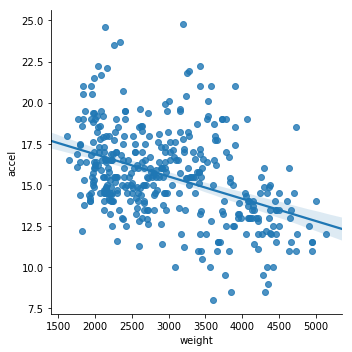

In [51]:
# Seaborn's Implot can be used for statistical correlation analysis. The shaded area represents confidence intervals.
# Fit and visualize a simple linear regression between two variables using sb.lmplot().
sb.lmplot(x = "weight", y = "accel", data = auto);

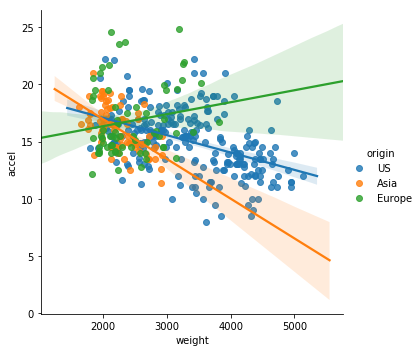

In [52]:
# Property hue = "x" plots the correlation data for each category
sb.lmplot(x = "weight", y = "accel", hue="origin" ,data = auto);

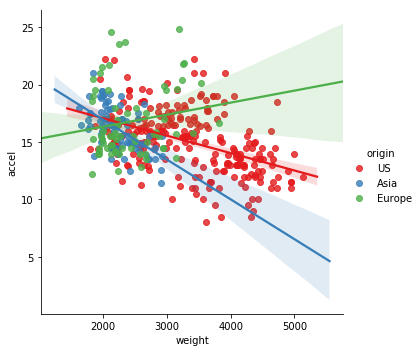

In [53]:
# Property palette = "x" changes the color scheme
sb.lmplot(x = "weight", y = "accel", hue="origin", palette = "Set1" ,data = auto);

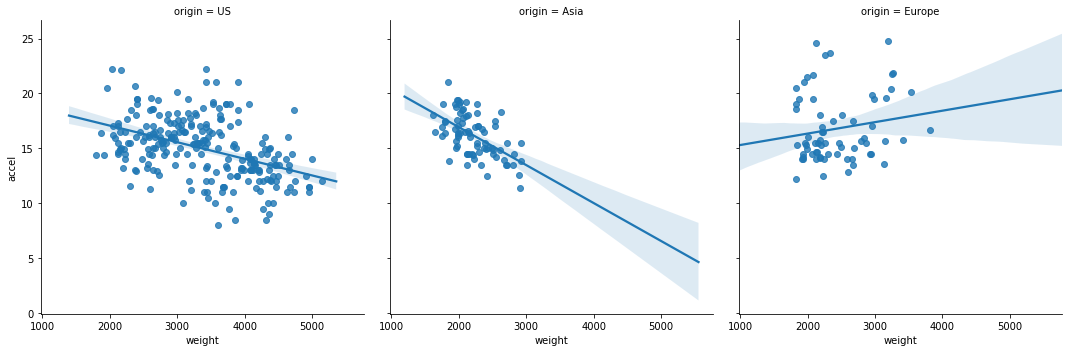

In [55]:
# Property Col = "x" produces a separate subplot for each data category when looking at correlations
sb.lmplot(x = "weight", y = "accel", col = "origin",data = auto);

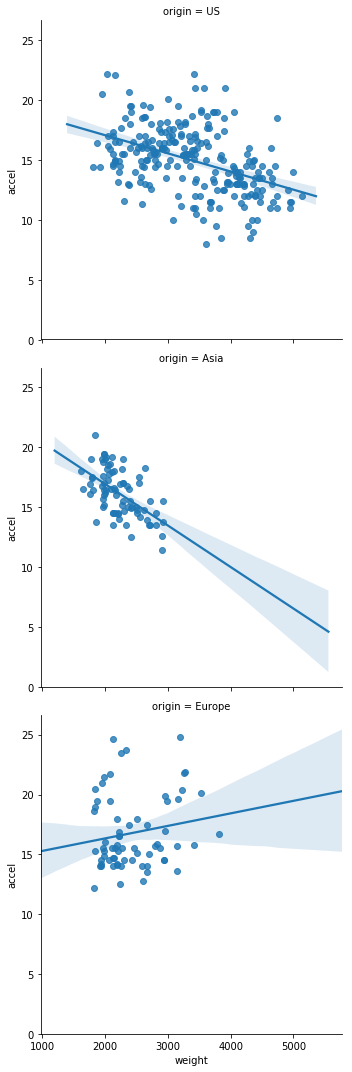

In [77]:
# Property row = "x" produces a separate subplot for each data category when looking at correlations
sb.lmplot(x = "weight", y = "accel", row = "origin",data = auto);

# 2. Seaborn's Residplot()
Often, you don't just want to see the regression itself but also see the residuals to get a better idea how well the regression captured the data.

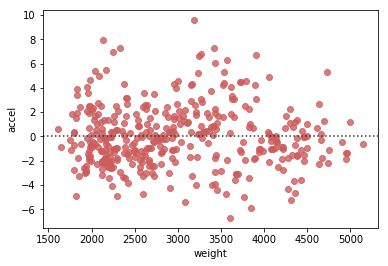

In [58]:
# Plot the residuals of a linear regression - Or visualizing how far datapoints diverge from the regression line.
# Propert color = "x" sets the color scheme. X and y can be arrays or strings.


sb.residplot(data = auto, x= "weight", y="accel", color= "indianred");

# 3. Higher Order Regression Line
When there are more complex relationships between two variables, a simple first order regression is often not sufficient to accurately capture the relationship between the variables. Seaborn makes it simple to compute and visualize regressions of varying orders.

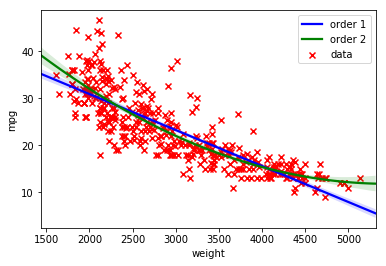

In [76]:
# Generate a scatter plot of 'weight' and 'mpg' using red circles
plt.scatter(auto['weight'], auto['mpg'], label='data', color='red', marker='x')

# Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
sb.regplot(x='weight', y='mpg', data=auto, color="blue", scatter=None, order = 1, label='order 1')

# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sb.regplot(x='weight', y='mpg', data=auto, color="green", scatter=None, order = 2,  label='order 2')


# Add a legend and display the plot
plt.legend(loc = "upper right")
plt.show()

# 4. Univariate Distributions

## Strip Plot

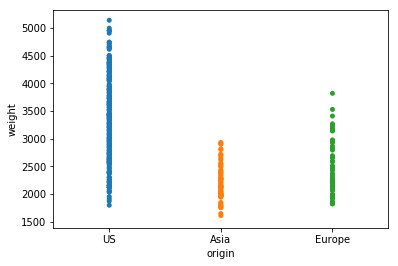

In [91]:
# Strip plot shows the univariate distributions for each category of data
sb.stripplot(data = auto, x= "origin", y="weight", jitter = False);

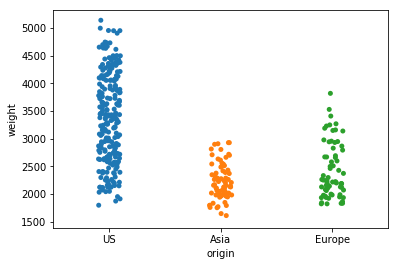

In [97]:
# Jitter allows us to show the distribution a bit clearer
sb.stripplot(data = auto, x= "origin", y="weight", jitter = True);

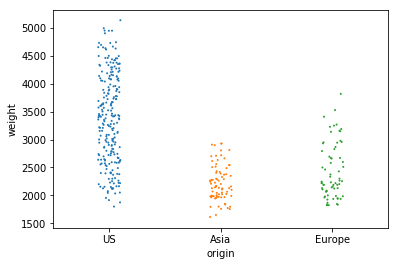

In [99]:
# The size property allows you to reduce the size of individual points on the plot
sb.stripplot(data = auto, x= "origin", y="weight", jitter = True, size = 2);

## Swarm Plots

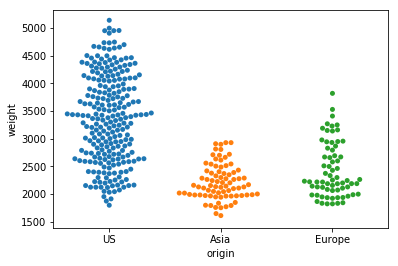

In [103]:
# The size property allows you to reduce the size of individual points on the plot
sb.swarmplot(data = auto, x= "origin", y="weight");

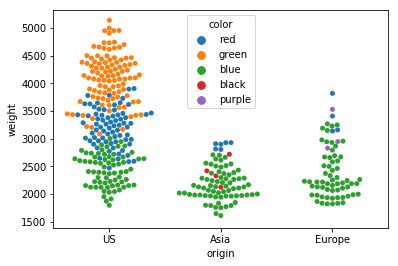

In [124]:
# Use hue = "x" to indetify another categorical column
sb.swarmplot(data = auto, x= "origin", y="weight", hue = "color");

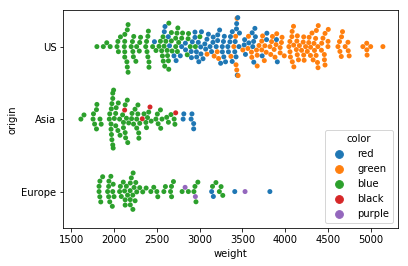

In [127]:
# Use orinet="h" to change the orientation of the plot. You also need to swap x and y attributes.
sb.swarmplot(data = auto, y= "origin", x="weight", hue = "color", orient="h");

## Box Plot vs Violoin Plot Vs Swarm Plot

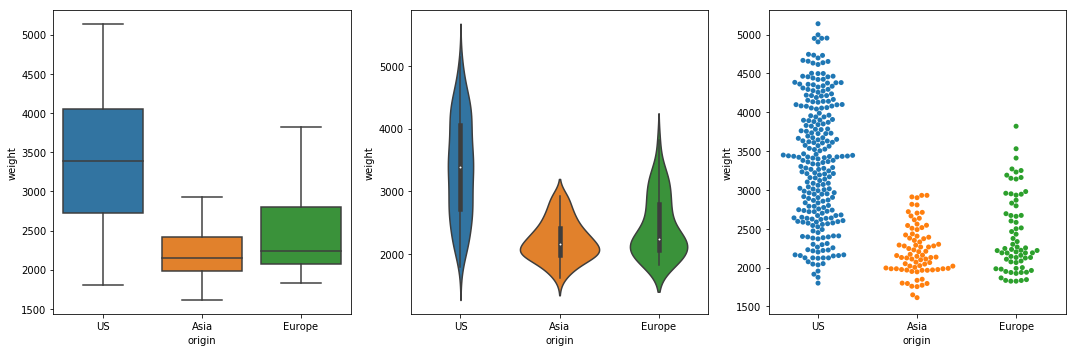

In [141]:
# For a lot of data it is better to use violin or box plots. Violin is better for visualising distributions
# Box plots are better for visualising statistics of the distributions

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sb.boxplot(data = auto, x="origin", y= "weight")
plt.subplot(1,3,2)
sb.violinplot(data = auto, x="origin", y="weight");
plt.tight_layout()
plt.subplot(1,3,3)
sb.swarmplot(data = auto, x= "origin", y="weight");

## Combining Plots

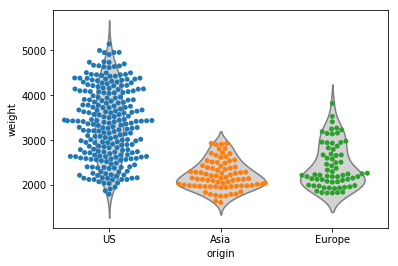

In [156]:
# You can combine multiple plots on top of each other. Simply make sure they are enhancing each other to tell the story.
# We remove the violin plot details here by inner = None and make them grey
# To combine plots, simply call multiple plotting functions one after the other.

sb.violinplot(data = auto, x="origin", y="weight", inner= None, color="lightgray"); # Inner = None Disable inner boxplot
sb.swarmplot(data = auto, x= "origin", y="weight");

# 5. Visualizing multivariate distributions


C:\Program Files\Anaconda3 2018.12\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


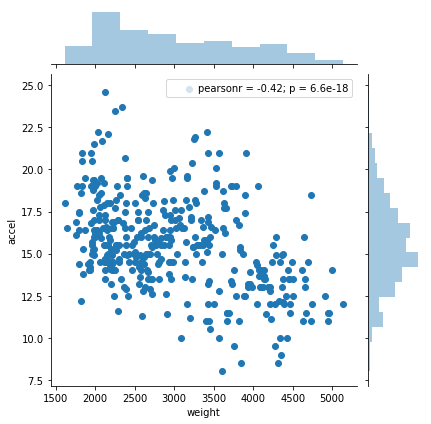

In [181]:
# Draw a correlation distribution chart using jointplot and annotate it with pearson cofficient 
# and p statistical significance
import scipy.stats as stats
sb.jointplot(x = "weight", y="accel", data= auto).annotate(stats.pearsonr);

C:\Program Files\Anaconda3 2018.12\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


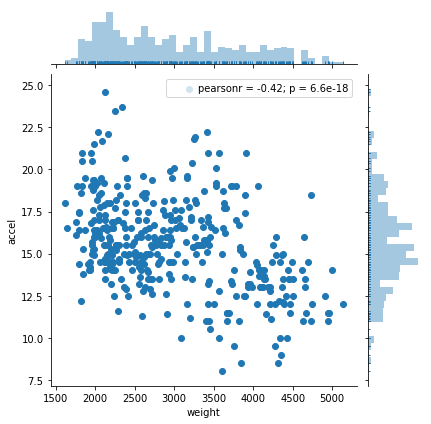

In [182]:
# Change the bin sizes of the histograms to 40 and show the show the rugs
sb.jointplot(x = "weight", y="accel", data= auto, marginal_kws=dict(bins=40, rug=True)).annotate(stats.pearsonr);

C:\Program Files\Anaconda3 2018.12\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Program Files\Anaconda3 2018.12\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


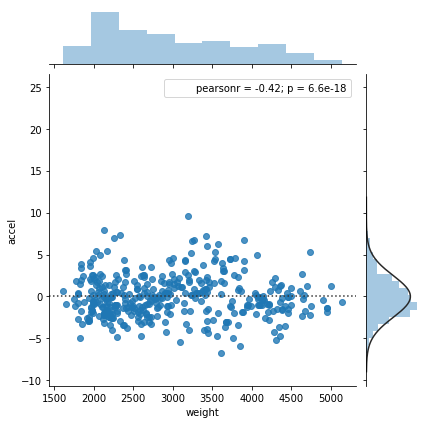

In [199]:
# Change the jointplot to Residual Type
sb.jointplot(x = "weight", y="accel", data= auto, kind="resid").annotate(stats.pearsonr);

C:\Program Files\Anaconda3 2018.12\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


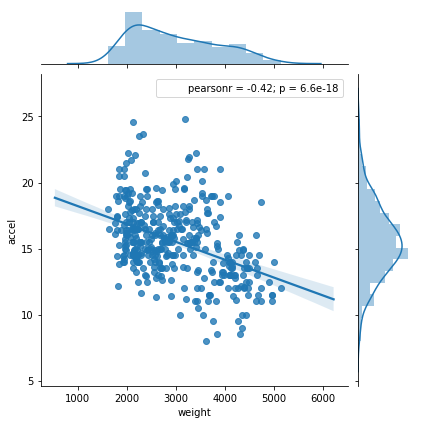

In [183]:
# Change the jointplot to Regression Type
sb.jointplot(x = "weight", y="accel", data= auto, kind="reg").annotate(stats.pearsonr);

C:\Program Files\Anaconda3 2018.12\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


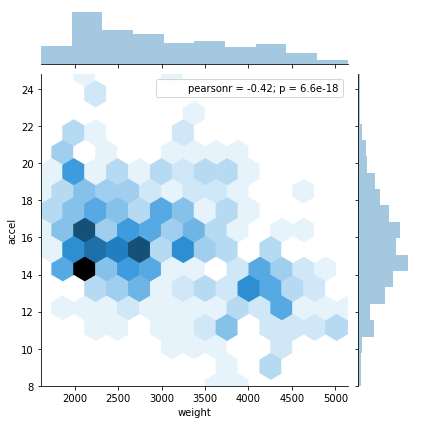

In [184]:
# Change the jointplot to Hexagonal type
sb.jointplot(x = "weight", y="accel", data= auto, kind="hex").annotate(stats.pearsonr);

C:\Program Files\Anaconda3 2018.12\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


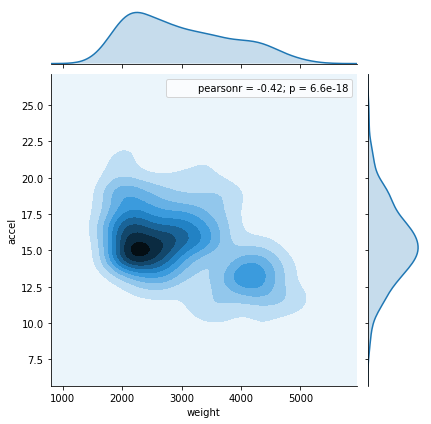

In [185]:
# Change the joinplot type to Kernel Density Estimation type
sb.jointplot(x = "weight", y="accel", data= auto, kind="kde").annotate(stats.pearsonr);

C:\Program Files\Anaconda3 2018.12\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


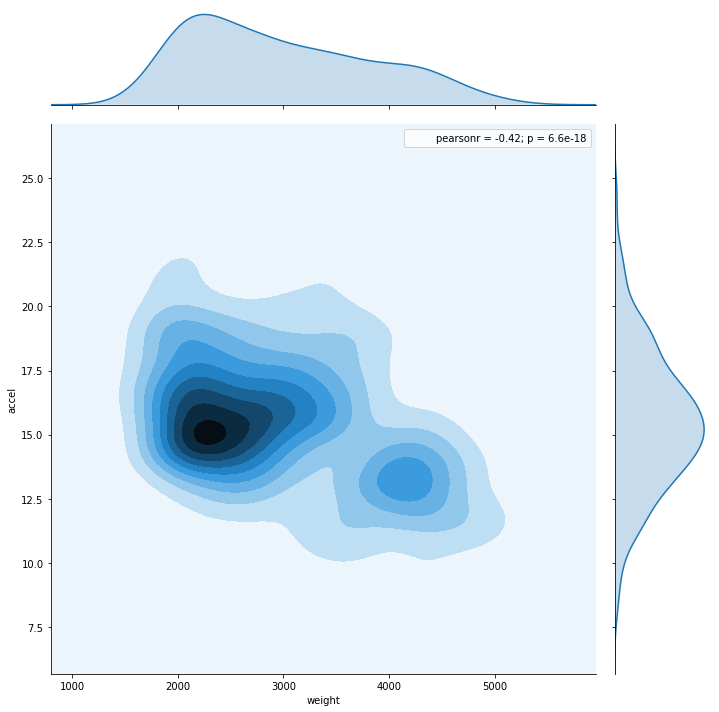

In [186]:
# Use the height = int to resize the graph.
sb.jointplot(x = "weight", y="accel", data= auto, kind="kde", height = 10).annotate(stats.pearsonr);

## Pairplots

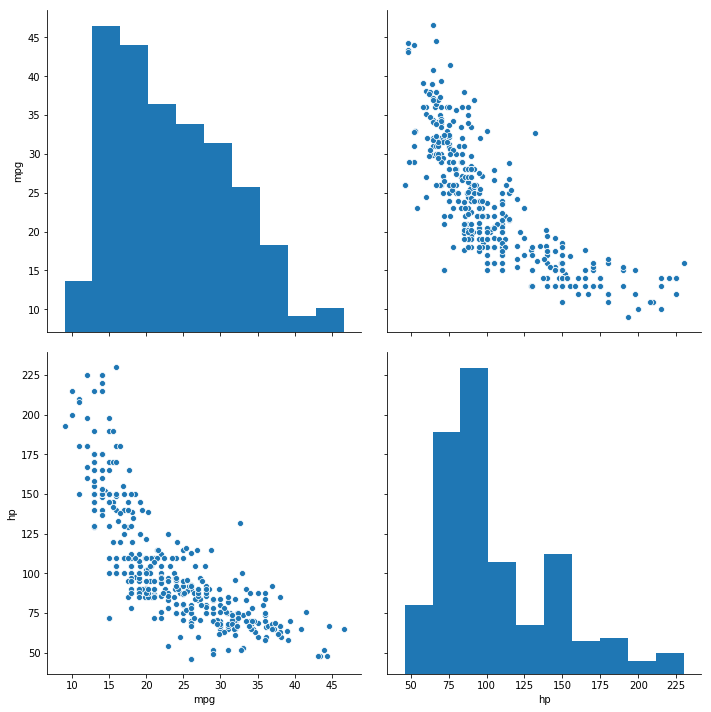

In [207]:
# Look at all the data and plot together any pairs of variables that can construct a multivariate distribution
# Ignore all categorical columns
sb.pairplot(auto[["mpg", "hp","origin"]], height=5);

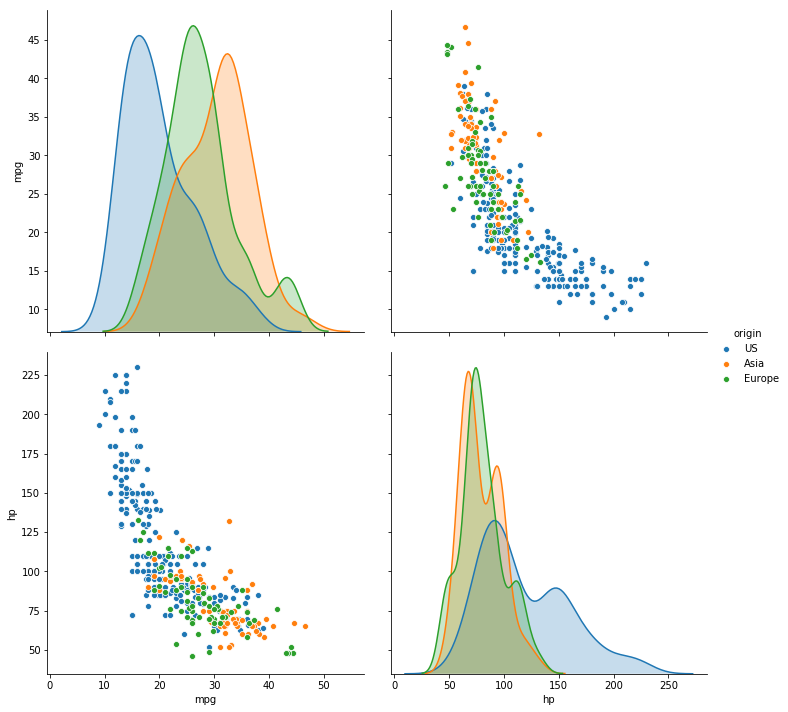

In [209]:
# Adding a new grouping by hue="x"
sb.pairplot(auto[["mpg", "hp","origin"]], hue="origin", height=5);

C:\Program Files\Anaconda3 2018.12\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


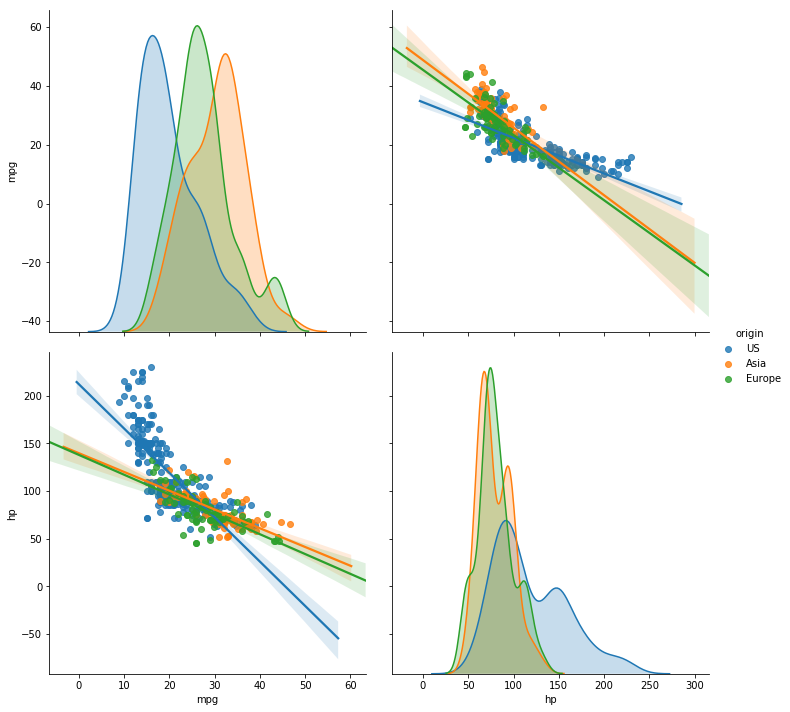

In [208]:
# Adding a new grouping by hue="x"
sb.pairplot(auto[["mpg", "hp","origin"]], hue="origin", kind="reg", height=5);

## Heatmaps

            total_bill  tip  size
total_bill         1.0  0.8   0.4
tip                0.8  1.0   0.6
size               0.4  0.6   1.0


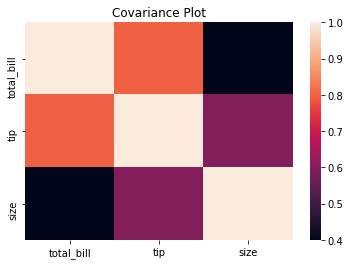

In [198]:
# To construct a heatmap, we need a dataframe of covariance data. 
# Here, the covariance suggests how much a variable changes as the other variable changes.
test_data = {"total_bill": [1.0, 0.8, 0.4], "tip": [0.8, 1.0, 0.6], "size": [0.4, 0.6, 1.0]}
covariance = pd.DataFrame(test_data, index=["total_bill", "tip", "size"])
print(covariance)
sb.heatmap(covariance);
plt.title("Covariance Plot");